# System Analysis

# Initialization

In [1]:
# Helper function to calculate Euclidean distance
import pandas as pd
from numpy import log10, sqrt

def euclid(x, y, df, take_log=False):
    if take_log:
        return sqrt(sum((log10(df[x])-log10(df[y]))**2))
    else:
        return sqrt(sum((df[x]-df[y])**2))
def sema(vect, fig):
    #semantics=', '.join('{}={}'.format(x,y) for (x,y) in fig.pepperargs['default'].items() if x != 'conc')
    nv = []
    for line in vect:
        v = []
        for (x,y) in fig.pepperargs[line].items():
            if x == 'conc': continue
            if x == 'max_complex_size': continue
            if x == 'max_complex_count': continue
            if x == 'max_reaction_count': continue
            if x == 'condensed': 
                z = x if y is True else 'detailed'
            else:
                z = '{}={}'.format(x,y)
            v.append(z)
        nv.append(', '.join(v))
    return nv

In [2]:
from zhang2007 import data; z07 = data()
from yin2008 import data; y08 = data()
from zhang2009 import data; z09 = data()
from zhang2010 import data; z10 = data()
from zhang2011 import data; z11 = data()
from kotani2017 import data; k17 = data()

%who list

k17	 y08	 z07	 z09	 z10	 z11	 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
# Main Figures:
Table1 = pd.DataFrame()

# Peppercorn estimates
## Zhang 2007

In [5]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in z07:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose=0)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        #display(df)
        Table1 = Table1.append(df)


Zhang et al. (2007) Fig. 1 - Single-layer catalytic DSD system (varying catalyst)
Zhang et al. (2007) Fig. 3 - Two-layer feedforward DSD system (varying catalyst)
Zhang et al. (2007) Fig. 4 - Autocatalytic DSD system (varying autocatalyst)


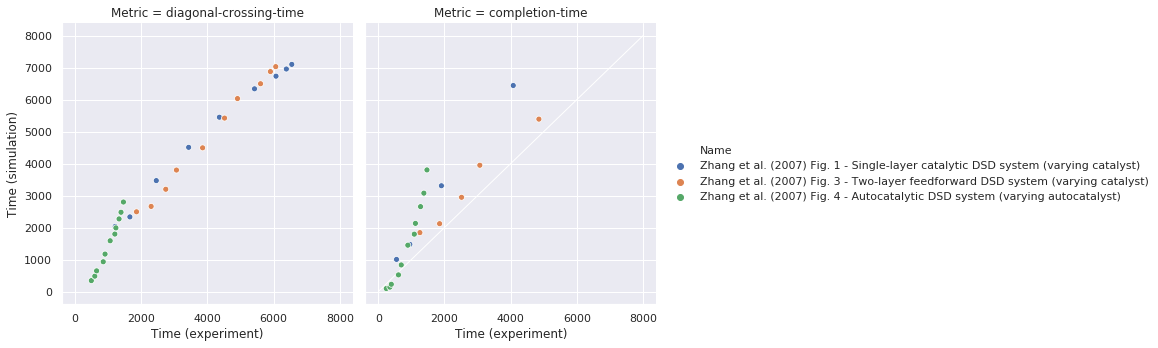

In [6]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in z07])]
#display(tmpfig)
#g = sns.lmplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig, fit_reg=False, markers=m, legend=True)
# Plot data
sns.relplot(x="Time (experiment)", y="Time (simulation)", col="Metric", hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 8e3)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Yin2008

In [7]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in y08:
    print(fig.name)
    display(fig.pepperargs['default'])
    fig.eval(verbose = 0)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        #display(df)
        Table1 = Table1.append(df)

Yin et al. (2008) Fig. 3 - Autocatalytic hairpin system (varying initiator)


{'conc': 'nM', 'condensed': True, 'k_slow': 1e-05, 'k_fast': 0.1}

,Input Filename,Simulation,Reporter,Metric,Metric-values,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Yin2008-F3-00,I=20,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.079210,89.004945,3.30,297.38,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
1,tmp/Yin2008-F3-00,I=6,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.186745,199.011056,5.23,2256.56,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
2,tmp/Yin2008-F3-00,I=2,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.286416,297.016501,7.37,4411.66,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
3,tmp/Yin2008-F3-00,I=1,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.352123,353.019612,8.72,5811.08,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
4,tmp/Yin2008-F3-00,I=0.6,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.363477,393.021835,9.83,6930.61,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
5,tmp/Yin2008-F3-00,I=0.4,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.403168,423.023501,10.45,7546.36,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
6,tmp/Yin2008-F3-00,I=0.2,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.469049,473.026279,11.17,8302.04,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
7,tmp/Yin2008-F3-00,I=0.1,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.493063,523.029057,11.76,8973.76,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
8,tmp/Yin2008-F3-00,I=0.06,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.528419,559.031057,12.11,9281.63,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...
9,tmp/Yin2008-F3-00,I=0.02,A,diagonal-crossing-time,18000:2;-20,"condensed, k_slow=1e-05, k_fast=0.1",2.597645,636.035335,12.38,9561.52,Yin et al. (2008) Fig. 3 - Autocatalytic hairp...


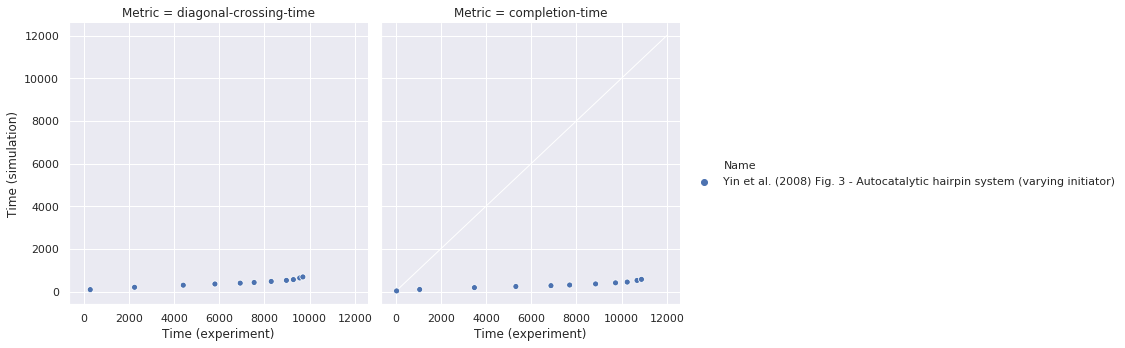

In [8]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in y08])]
display(tmpfig)

sns.relplot(x="Time (experiment)", y="Time (simulation)", col = 'Metric', hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 1.2e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Zhang 2009 

In [9]:
for fig in z09:
    print(fig.name)
    print(fig.pepperargs['default'])
    fig.eval(cmpfig='hack')
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)
        

Zhang & Winfree (2009) Fig. 3 - Single strand displacement reactions (varying toehold length)
{'conc': 'nM', 'condensed': True}
Zhang & Winfree (2009) Fig. 3 - Single strand displacement reactions (varying toehold length) -- Fitness: 0.176225
Zhang & Winfree (2009) Fig. 4 - Single toehold exchange reactions (varying toehold lengths)
{'conc': 'nM', 'condensed': True}
Zhang & Winfree (2009) Fig. 4 - Single toehold exchange reactions (varying toehold lengths) -- Fitness: 0.40601
Zhang & Winfree (2009) Fig. 5 - Catalytic DSD system (varying toehold lengths)
{'conc': 'nM', 'condensed': True}
Zhang & Winfree (2009) Fig. 5 - Catalytic DSD system (varying toehold lengths) -- Fitness: 0.921051


,Input Filename,Simulation,Reporter,Metric,Metric-values,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Zhang2009-F3-00,X=0.6,F,diagonal-crossing-time,7200:0.4,condensed,0.312514,1575.087505,0.31,1260.00,Zhang & Winfree (2009) Fig. 3 - Single strand ...
1,tmp/Zhang2009-F3-00,X=0.4,F,diagonal-crossing-time,7200:0.4,condensed,0.272420,2297.127618,0.27,1867.00,Zhang & Winfree (2009) Fig. 3 - Single strand ...
2,tmp/Zhang2009-F3-00,X=0.2,F,diagonal-crossing-time,7200:0.4,condensed,0.177552,4005.222512,0.17,3498.00,Zhang & Winfree (2009) Fig. 3 - Single strand ...
3,tmp/Zhang2009-F3-00,X=0.6,F,completion-time,0.3,condensed,0.300000,1480.082227,0.30,1241.01,Zhang & Winfree (2009) Fig. 3 - Single strand ...
4,tmp/Zhang2009-F3-00,X=0.4,F,completion-time,0.3,condensed,0.300000,2824.156898,0.30,2430.95,Zhang & Winfree (2009) Fig. 3 - Single strand ...
0,tmp/Zhang2009-F4-00,X=0.4,F,completion-time,0.2,condensed,0.200000,564.031335,0.20,527.64,Zhang & Winfree (2009) Fig. 4 - Single toehold...
1,tmp/Zhang2009-F4-01,X=0.4,F,completion-time,0.2,condensed,0.200000,566.031446,0.20,578.28,Zhang & Winfree (2009) Fig. 4 - Single toehold...
2,tmp/Zhang2009-F4-02,X=0.4,F,completion-time,0.2,condensed,0.200000,590.032780,0.20,983.36,Zhang & Winfree (2009) Fig. 4 - Single toehold...
3,tmp/Zhang2009-F4-03,X=0.4,F,completion-time,0.2,condensed,0.200000,949.052725,0.20,1877.93,Zhang & Winfree (2009) Fig. 4 - Single toehold...
4,tmp/Zhang2009-F4-00,X=0.4,F,diagonal-crossing-time,3600:0.4,condensed,0.291944,974.054114,0.28,785.00,Zhang & Winfree (2009) Fig. 4 - Single toehold...


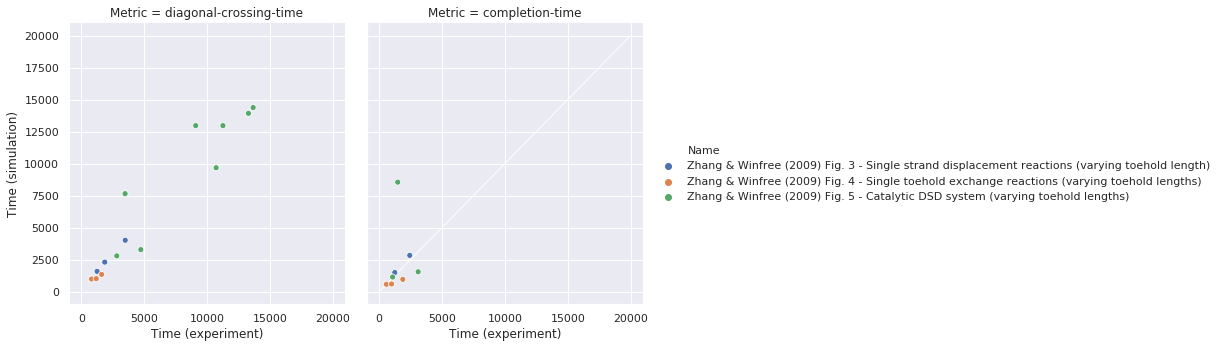

In [10]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in z09])]
display(tmpfig)

sns.relplot(x="Time (experiment)", y="Time (simulation)", col = 'Metric', hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 2e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Zhang 2010

In [11]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in z10:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose = 1)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Zhang & Winfree (2010) Fig. 3A - Catalytic DSD system with 100 nM substrates (varying catalyst)
tmp/Zhang2010-F3A-00: default
tmp/Zhang2010-F3A-00: default
tmp/Zhang2010-F3A-00: default
tmp/Zhang2010-F3A-00: default
Zhang & Winfree (2010) Fig. 3A - Catalytic DSD system with 100 nM substrates (varying catalyst) -- Fitness: 0.797953
Zhang & Winfree (2010) Fig. 3B - Catalytic DSD system 30 nM substrates (varying catalyst)
tmp/Zhang2010-F3B-00: default
tmp/Zhang2010-F3B-00: default
tmp/Zhang2010-F3B-00: default
tmp/Zhang2010-F3B-00: default
Zhang & Winfree (2010) Fig. 3B - Catalytic DSD system 30 nM substrates (varying catalyst) -- Fitness: 0.303608
Zhang & Winfree (2010) Fig. 3C - Catalytic DSD system with 3 nM substrates (varying catalyst)
tmp/Zhang2010-F3C-00: default
tmp/Zhang2010-F3C-00: default
tmp/Zhang2010-F3C-00: default
tmp/Zhang2010-F3C-00: default
Zhang & Winfree (2010) Fig. 3C - Catalytic DSD system with 3 nM substrates (varying catalyst) -- Fitness: 0.0717562
Zhang & Winfree 

,Input Filename,Simulation,Reporter,Metric,Metric-values,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Zhang2010-F3A-00,C=10,ROX,diagonal-crossing-time,21600:100,condensed,95.151362,1049.012127,88.07,2557.53,Zhang & Winfree (2010) Fig. 3A - Catalytic DSD...
1,tmp/Zhang2010-F3A-00,C=1,ROX,diagonal-crossing-time,21600:100,condensed,71.581490,6141.070995,44.61,11842.47,Zhang & Winfree (2010) Fig. 3A - Catalytic DSD...
2,tmp/Zhang2010-F3A-00,C=10,ROX,completion-time,50,condensed,50.000000,404.004671,50.00,611.58,Zhang & Winfree (2010) Fig. 3A - Catalytic DSD...
3,tmp/Zhang2010-F3A-00,C=1,ROX,completion-time,50,condensed,50.000000,3909.045191,50.00,15956.76,Zhang & Winfree (2010) Fig. 3A - Catalytic DSD...
0,tmp/Zhang2010-F3B-00,C=3,ROX,diagonal-crossing-time,21600:30,condensed,26.050240,2847.032914,24.15,4200.75,Zhang & Winfree (2010) Fig. 3B - Catalytic DSD...
1,tmp/Zhang2010-F3B-00,C=0.9,ROX,diagonal-crossing-time,21600:30,condensed,20.839105,6597.076267,17.45,9051.94,Zhang & Winfree (2010) Fig. 3B - Catalytic DSD...
2,tmp/Zhang2010-F3B-00,C=3,ROX,completion-time,15,condensed,15.000000,1345.015549,15.00,1571.89,Zhang & Winfree (2010) Fig. 3B - Catalytic DSD...
3,tmp/Zhang2010-F3B-00,C=0.9,ROX,completion-time,15,condensed,15.000000,4373.050555,15.00,6938.02,Zhang & Winfree (2010) Fig. 3B - Catalytic DSD...
0,tmp/Zhang2010-F3C-00,C=0.9,ROX,diagonal-crossing-time,43200:3,condensed,2.372438,9039.104498,2.30,10199.26,Zhang & Winfree (2010) Fig. 3C - Catalytic DSD...
1,tmp/Zhang2010-F3C-00,C=0.3,ROX,diagonal-crossing-time,43200:3,condensed,1.819404,17001.196550,1.82,17034.36,Zhang & Winfree (2010) Fig. 3C - Catalytic DSD...


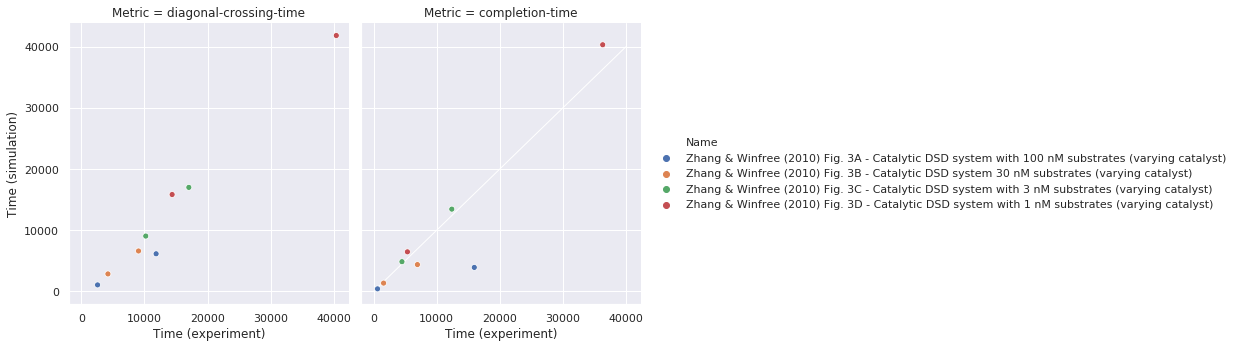

In [12]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in z10])]
display(tmpfig)
sns.relplot(x="Time (experiment)", y="Time (simulation)", col = 'Metric', hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 4e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

# Zhang 2011

In [13]:
for fig in z11:
    print(fig.name)
    #print(fig.pepperargs['default'])
    fig.eval(verbose=1)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Zhang (2011) Fig. 3A - Cooperative strand displacement
tmp/Zhang2011-F3A-00: default
tmp/Zhang2011-F3A-00: default
tmp/Zhang2011-F3A-00: default
tmp/Zhang2011-F3A-00: default
tmp/Zhang2011-F3A-00: default
tmp/Zhang2011-F3A-00: default
Zhang (2011) Fig. 3A - Cooperative strand displacement -- Fitness: 0.850897


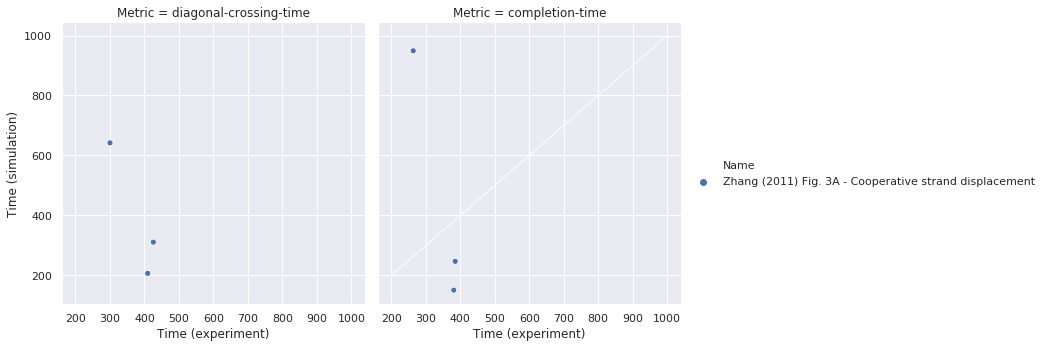

In [14]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in z11])]
#display(tmpfig)

sns.relplot(x="Time (experiment)", y="Time (simulation)", col='Metric', hue='Name', data=tmpfig)

#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(200, 1000)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Kotani & Hughes 2017

In [15]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in k17:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose = 1)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Kotani & Hughes (2017) Fig. 2 - Single-layer catalytic DSD with 4-way branch migration (varying catalyst)
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
Kotani & Hughes (2017) Fig. 2 - Single-layer catalytic DSD with 4-way branch migration (varying catalyst) -- Fitness: 0.576416
Kotani & Hughes (2017) Fig. 3 - Two-layer feedforward DSD system with 4-way branch migration (varying catalyst)
tmp/Kotani2017-F3-00: default
tmp/Kotani2017-F3-00: default
tmp/Kotani2017-F3-00: default
tmp/Kotani2017-F3-00: default
Kotani & Hughes (2017) Fig. 3 - Two-layer feedforward DSD system with 4-way branch migration (varying catalyst) -- Fitness: 0.243497
Kotani & Hughes (2017) Fig. 4 - Autocatalytic DSD system with 4-way branch migration (varying autocatalyst)
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: de

,Input Filename,Simulation,Reporter,Metric,Metric-values,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Kotani2017-F2-00,C1=1,D,diagonal-crossing-time,32400:10,"condensed, release_cutoff=7",8.358126,5322.295683,7.49,4893.97,Kotani & Hughes (2017) Fig. 2 - Single-layer c...
1,tmp/Kotani2017-F2-00,C1=0.5,D,diagonal-crossing-time,32400:10,"condensed, release_cutoff=7",7.545820,7954.441913,6.29,9388.93,Kotani & Hughes (2017) Fig. 2 - Single-layer c...
2,tmp/Kotani2017-F2-00,C1=0.05,D,diagonal-crossing-time,32400:10,"condensed, release_cutoff=7",3.262770,21829.212730,1.35,27435.62,Kotani & Hughes (2017) Fig. 2 - Single-layer c...
3,tmp/Kotani2017-F2-00,C1=1,D,completion-time,5,"condensed, release_cutoff=7",5.000000,2010.111673,5.00,555.34,Kotani & Hughes (2017) Fig. 2 - Single-layer c...
4,tmp/Kotani2017-F2-00,C1=0.5,D,completion-time,5,"condensed, release_cutoff=7",5.000000,3918.217679,5.00,4514.48,Kotani & Hughes (2017) Fig. 2 - Single-layer c...
0,tmp/Kotani2017-F3-00,C1=0.1,D,diagonal-crossing-time,97200:10,"condensed, release_cutoff=7",6.776349,31363.116240,7.78,21370.60,Kotani & Hughes (2017) Fig. 3 - Two-layer feed...
1,tmp/Kotani2017-F3-00,C1=0.01,D,diagonal-crossing-time,97200:10,"condensed, release_cutoff=7",2.361930,74275.822940,3.17,66095.66,Kotani & Hughes (2017) Fig. 3 - Two-layer feed...
2,tmp/Kotani2017-F3-00,C1=0.001,D,diagonal-crossing-time,97200:10,"condensed, release_cutoff=7",0.335378,93990.977410,0.74,90663.66,Kotani & Hughes (2017) Fig. 3 - Two-layer feed...
3,tmp/Kotani2017-F3-00,C1=0.1,D,completion-time,5,"condensed, release_cutoff=7",5.000000,19196.691730,5.00,12994.28,Kotani & Hughes (2017) Fig. 3 - Two-layer feed...
0,tmp/Kotani2017-F4-00,C1=0.1,D,diagonal-crossing-time,18000:10,release_cutoff=8,5.679774,7784.432468,6.11,6800.87,Kotani & Hughes (2017) Fig. 4 - Autocatalytic ...


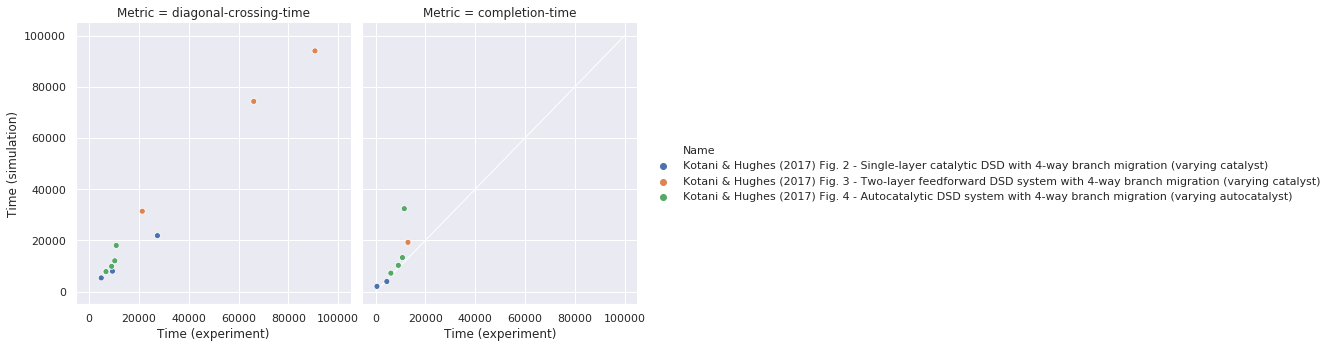

In [16]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in k17])]
display(tmpfig)

sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', col='Metric', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e1, 1e5)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

# Everything

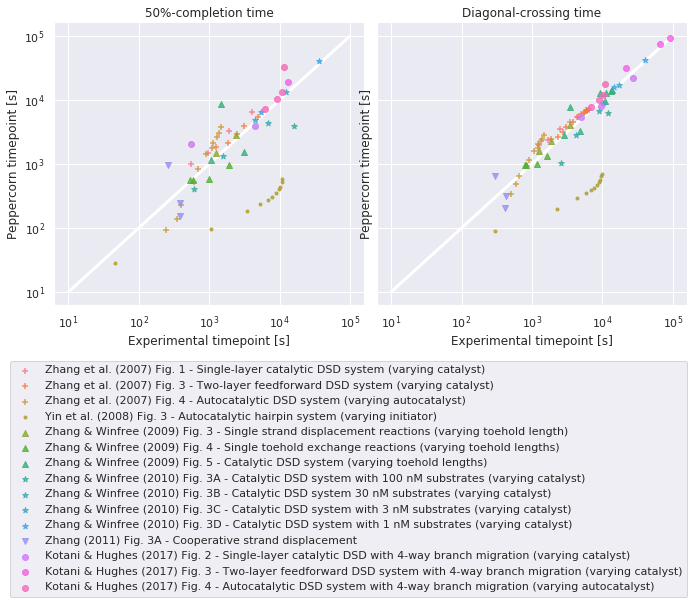

In [17]:
#display(Table1)
Table1.to_latex('ManySystems.tex', index=False, float_format='{:.3g}'.format)
tmpfig = Table1
#tmpfig.reset_index(inplace=True, drop=True)
#tmpfig = tmpfig.iloc[0:-1]
#tmpfig = tmpfig.iloc[[4,5,6,7,28,29,30,31], :]
#display(tmpfig)

#sns.set_palette("husl")
#sns.set(rc={'figure.figsize':(4,4)})

m = ['+'] * 3
m += ['.']
m += ['^'] * 3
m += ['*'] * 4
m += ['v']
m += ['o'] * 3

#g = sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig)
g = sns.lmplot(x = "Time (experiment)", y = "Time (simulation)", 
               col = 'Metric', hue = 'Name', sharey = True, col_order = ['completion-time', 'diagonal-crossing-time'],
               data = tmpfig, markers = m, 
               fit_reg = False, legend = False)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, -0.2), loc=1, borderaxespad=0.)#, fontsize = 10)
#plt.legend(loc='upper left')

#plt.xlim(1e3, 1e5)
#plt.ylim(1e2, 1e6)
mi, ma = 1e1, 1e5

for ax in g.axes[0]:
    ax.plot([mi, ma], [mi, ma], linewidth=3, color='white', zorder=0)

g.axes[0][0].set_title('50%-completion time')
g.axes[0][1].set_title('Diagonal-crossing time')

#g.set_titles(row_template="{row_name}", col_template="{col_name}")


g.set(xlabel='Experimental timepoint [s]')  
g.set(ylabel='Peppercorn timepoint [s]')

plt.savefig('all_systems.pdf', bbox_inches='tight')
plt.savefig('all_systems.svg', bbox_inches='tight')